In [1]:
# Homework (due on 25th):
# A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method
# and plot height (z) vs time (t).


\begin{equation}
\begin{aligned}
\frac{dz(t)}{dt} &= v(t) \\
\frac{dv(t)}{dt} &= g  \\
g &= -9.81m/s^2
\end{aligned}
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h, y+0.5*k1)
    k3= h*f(t+0.5*h, y+0.5*k2) 
    k4= h*f(t+h, y+k3) 
    y = y + (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4) 
    return y

def f(t, y):
    f=np.zeros(2)
    f[0] = y[1]
    f[1] = g
    return f

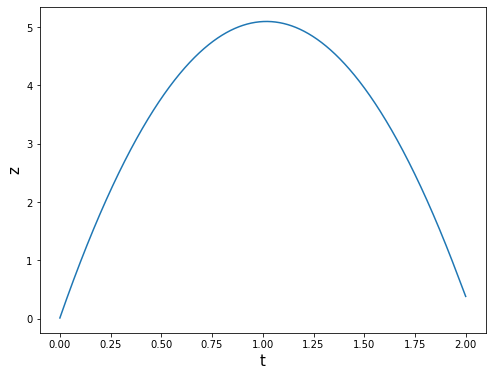

In [4]:
g = -9.81
h=0.001
tmax = 2.
t = 0
y = [0, 10.]


tlist = []
zlist = []
vzlist = []
while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    y = rk4(t, h, y, 2)
    tlist=np.append(tlist, t)
    zlist=np.append(zlist, y[0])
    vzlist=np.append(vzlist, y[1])
    #print(t, y)
    t = t+h
    
plt.figure(figsize = (8,6))
plt.plot(tlist, zlist)
plt.xlabel("t", fontsize = 15)
plt.ylabel("z", fontsize = 15)
plt.show()

In [5]:
print(zlist[-1])
v0 = 10.
g = -9.81
zend = v0*tmax + 0.5*g*tmax*tmax
print(zend)

0.37999999999913076
0.379999999999999


In [6]:
#simpson
def Integrate(function_list, x1, x2):
    n = len(function_list)
    if n%2 == 0:
        print("error: n is not odd.")
        return 0
    integ = function_list[0] + function_list[-1]
    for k in range(1,n-1):
        if k%2 == 0:
            integ = integ + 2*function_list[k]
        else:
            integ = integ + 4*function_list[k]
    integ = integ*((x2-x1)/(3*(n-1)))
    return integ

tlist = np.linspace(0, tmax, 101)
vlist = v0 + g*tlist
z = Integrate(vlist, tlist[0], tlist[-1])
print(z)

0.3799999999999993
